In [ ]:
# Classification binaire : Prédiction entre deux classes (ex : email spam ou non spam).
# Classification multi-classes : Plus de deux catégories (ex : reconnaissance de chiffres manuscrits 0-9).
# Classification multi-étiquettes : Un échantillon peut appartenir à plusieurs classes (ex : un film peut être à la fois action et comédie).

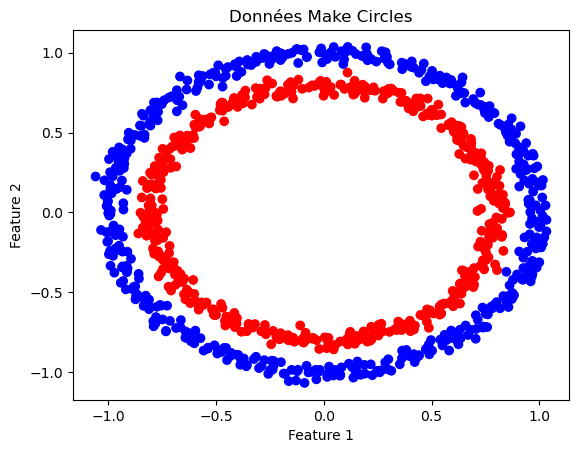

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Génération des données
samples = 1000
X, y = make_circles(samples, noise=0.03, random_state=42)

# Visualisation des données
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Données Make Circles")
plt.show()


In [2]:
# Création du modèle
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),  # Couche cachée
    tf.keras.layers.Dense(1, activation="sigmoid")  # Couche de sortie
])

# Compilation du modèle
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Entraînement
history = model.fit(X, y, epochs=100, verbose=0)

# Évaluation
loss, acc = model.evaluate(X, y)
print(f"Précision du modèle : {acc:.2f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6317 - loss: 0.6655
Précision du modèle : 0.65


In [3]:
# Modèle amélioré avec plus de couches et Adam comme optimiseur
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X, y, epochs=200, verbose=0)

loss, acc = model.evaluate(X, y)
print(f"Nouvelle précision : {acc:.2f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0157
Nouvelle précision : 1.00


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


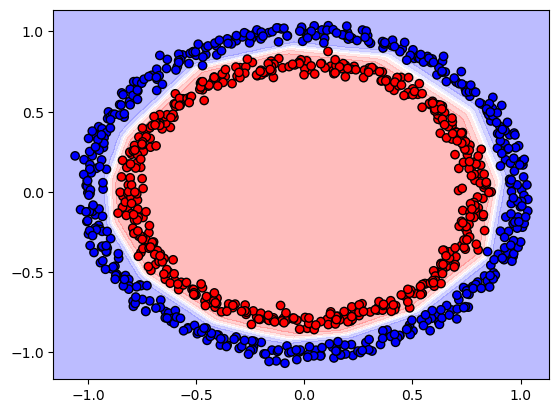

In [4]:
import numpy as np

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    X_new = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(X_new).reshape(xx.shape)
    
    plt.contourf(xx, yy, y_pred, cmap="bwr", alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
    plt.show()

plot_decision_boundary(model, X, y)


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X, y, epochs=200, verbose=0)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement sur l’ensemble d’entraînement
history = model.fit(X_train, y_train, epochs=200, verbose=0)

# Évaluation sur l’ensemble de test
loss, acc = model.evaluate(X_test, y_test)
print(f"Précision sur l’ensemble de test : {acc:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0094  
Précision sur l’ensemble de test : 1.00


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


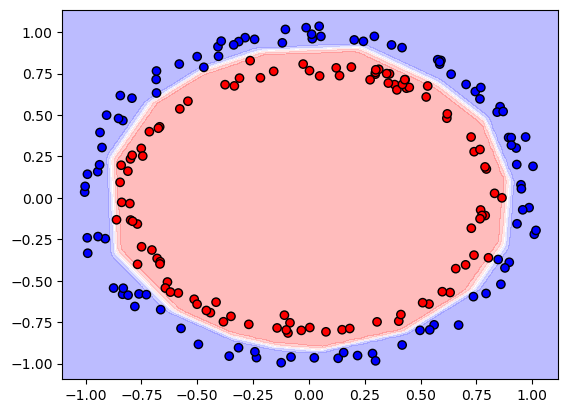

In [7]:
plot_decision_boundary(model, X_test, y_test)
